In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


In [2]:
df = pd.read_csv('data.csv')

print("To get an overview of the data:")
df.head()





To get an overview of the data:


,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,...,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
0,22,2143,0,0,1,3,21,404,416,240,...,17.397461,17.397461,87.584335,2.820312,2.539062,10.772400,8.576599,0.0,0.0,1.0
1,22,1735,0,2,0,3,8,381,416,240,...,14.426758,14.233398,48.025330,1.843750,1.921875,6.163086,6.665771,8816.0,8801.0,1.0
2,22,1971,0,0,0,0,8,460,416,240,...,15.203125,13.953125,56.613480,3.000000,4.937500,1.625000,3.683594,5104.0,5193.0,1.0
3,22,2473,0,0,0,18,20,421,416,240,...,21.725586,29.165039,283.079285,2.078125,2.500000,25.806396,34.656250,21531.0,19802.0,1.0
4,22,1093,0,0,1,3,8,167,416,240,...,11.929688,14.353516,175.123245,3.070312,4.523438,22.252869,14.780701,15073.0,14549.0,1.0


In [3]:
print("Number of rows:")
print(len(df))

print("-------------------------------------------------")
print("Column Types:")
df.dtypes



Number of rows:
16000
-------------------------------------------------
Column Types:


quality                int64
bits                   int64
intra_parts            int64
skip_parts             int64
inter_16x16_parts      int64
inter_4x4_parts        int64
inter_other_parts      int64
non_zero_pixels        int64
frame_width            int64
frame_height           int64
movement_level         int64
mean                 float64
sub_mean_1           float64
sub_mean_2           float64
sub_mean_3           float64
sub_mean_4           float64
var_sub_blocks       float64
sobel_h              float64
sobel_v              float64
variance             float64
block_movement_h     float64
block_movement_v     float64
var_movement_h       float64
var_movement_v       float64
cost_1               float64
cost_2               float64
relevant             float64
dtype: object

In [4]:
print("Number of null values in each column:")
df.isnull().sum(axis=0)

Number of null values in each column:


quality               0
bits                  0
intra_parts           0
skip_parts            0
inter_16x16_parts     0
inter_4x4_parts       0
inter_other_parts     0
non_zero_pixels       0
frame_width           0
frame_height          0
movement_level        0
mean                  0
sub_mean_1            0
sub_mean_2            0
sub_mean_3           14
sub_mean_4            0
var_sub_blocks        0
sobel_h               0
sobel_v               0
variance              0
block_movement_h      0
block_movement_v      0
var_movement_h        0
var_movement_v        0
cost_1                0
cost_2               17
relevant              2
dtype: int64

In [5]:
print("Description of each column:")
df.describe()


Description of each column:


,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,...,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,...,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,15983.000000,15998.000000
mean,29.500000,449.837312,11.040000,0.849187,0.995437,1.978687,3.686437,74.087125,1432.000000,850.000000,...,8.027763,8.271249,53.332864,8.023825,6.797076,841.948320,491.913447,36948.640625,42059.829569,0.822353
std,5.590345,549.338243,19.050616,1.181855,1.018507,3.901610,4.446710,102.640728,851.904548,530.205215,...,9.184907,9.552508,107.265796,17.259731,11.552299,3815.230446,2404.069505,38631.383338,43844.708679,0.382227
min,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,416.000000,240.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,728.000000,420.000000,...,0.897705,0.943359,1.424867,0.500000,0.500000,0.687500,0.746094,9916.750000,10965.000000,1.000000
50%,29.500000,243.000000,0.000000,0.000000,1.000000,0.000000,2.000000,33.000000,1376.000000,780.000000,...,5.171387,5.313477,14.525076,2.625000,3.210938,11.683594,19.527344,23051.500000,26135.000000,1.000000
75%,33.250000,622.000000,16.000000,1.000000,2.000000,3.000000,6.000000,100.000000,2080.000000,1210.000000,...,11.629883,11.776611,52.498295,7.062500,8.062500,94.025574,96.064392,52071.250000,59876.500000,1.000000
max,37.000000,4771.000000,64.000000,4.000000,4.000000,33.000000,27.000000,828.000000,2560.000000,1600.000000,...,69.706055,66.775391,2022.197998,322.093750,189.000000,194634.750000,68389.359375,425705.000000,446306.000000,1.000000


In [6]:
print("Number of unique elements in each column:")
df.nunique()

Number of unique elements in each column:


quality                  4
bits                  2106
intra_parts             15
skip_parts               5
inter_16x16_parts        5
inter_4x4_parts         12
inter_other_parts       28
non_zero_pixels        568
frame_width              4
frame_height             4
movement_level         205
mean                  6599
sub_mean_1            3123
sub_mean_2            3022
sub_mean_3            3072
sub_mean_4            2975
var_sub_blocks       11457
sobel_h               9908
sobel_v               9896
variance             12001
block_movement_h      2368
block_movement_v      2221
var_movement_h        8427
var_movement_v        8450
cost_1               14378
cost_2               14538
relevant                 2
dtype: int64

-------------------------------------------------
Correlations of variables with the target variable:
                   relevant
relevant           1.000000
bits               0.252393
non_zero_pixels    0.236884
sobel_v            0.197248
inter_other_parts  0.195646
sobel_h            0.194505
sub_mean_4         0.179225
sub_mean_3         0.151905
sub_mean_1         0.141184
sub_mean_2         0.138525
inter_4x4_parts    0.114044
variance           0.102842
cost_1             0.079386
intra_parts        0.075806
cost_2             0.075446
block_movement_v   0.067436
var_sub_blocks     0.054598
mean               0.028971
var_movement_v     0.015649
block_movement_h   0.009136
inter_16x16_parts -0.010243
var_movement_h    -0.016549
movement_level    -0.085982
frame_height      -0.137324
frame_width       -0.148213
skip_parts        -0.241371
quality           -0.250797
-------------------------------------------------


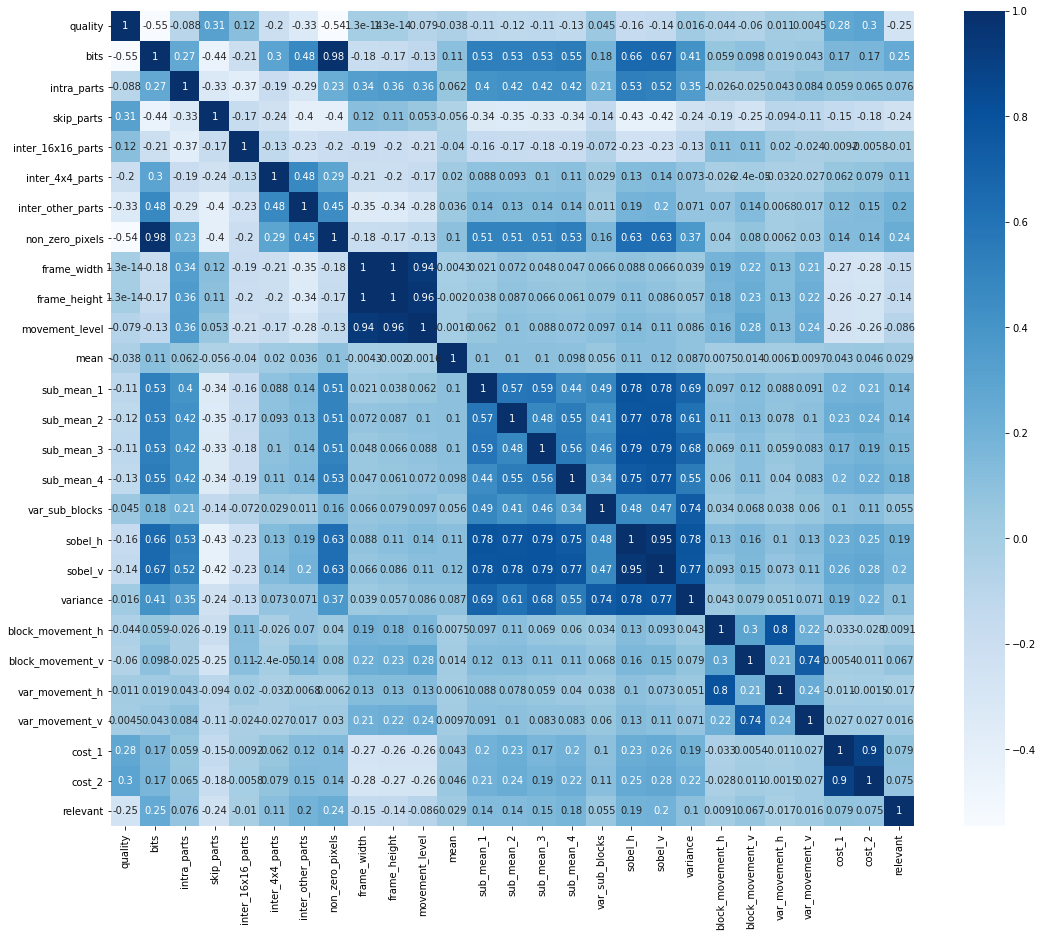

quality              0.250797
bits                 0.252393
skip_parts           0.241371
inter_other_parts    0.195646
non_zero_pixels      0.236884
sub_mean_3           0.151905
sub_mean_4           0.179225
sobel_h              0.194505
sobel_v              0.197248
relevant             1.000000
Name: relevant, dtype: float64

In [7]:
print("-------------------------------------------------")
print("Correlations of variables with the target variable:")
cor = df.corr()
print(cor.sort_values(by=["relevant"], ascending=False).filter(items=["relevant"]))

print("-------------------------------------------------")
plt.figure(figsize=(18,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()
cor_target = abs(cor["relevant"])
relevant_features = cor_target[cor_target>0.15]
relevant_features

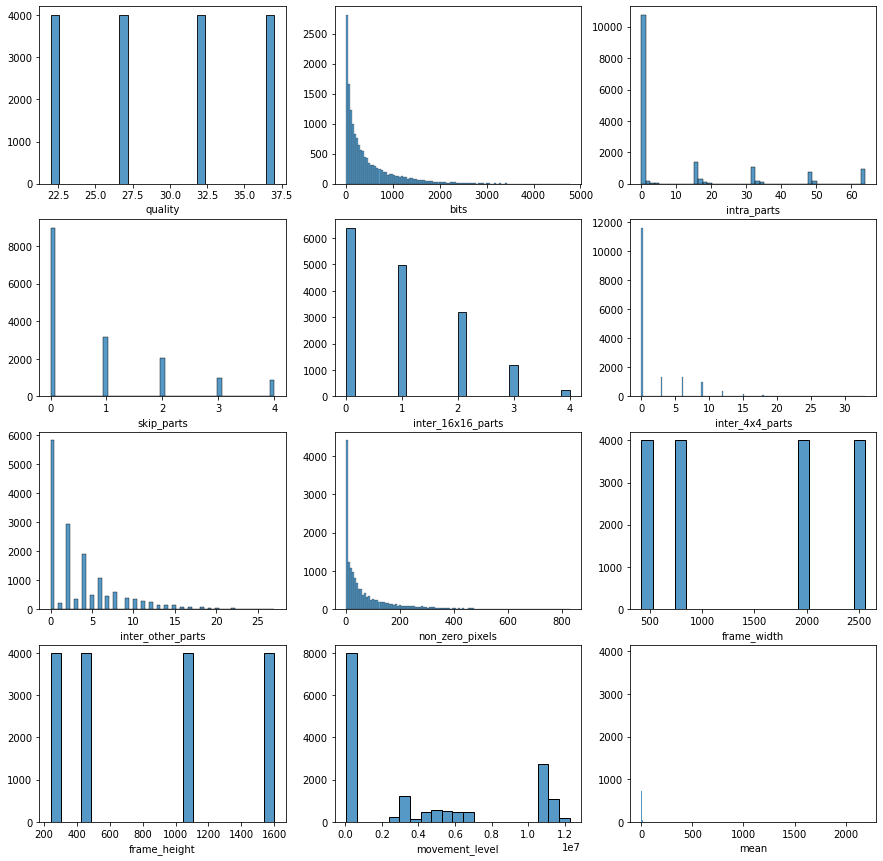

In [8]:
fig,axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))

for ax,feat in zip(axes.flatten(), list(df.columns.values)):
    sns.histplot(df, x=feat, ax=ax)
    ax.set(ylabel = '')

In [9]:
df = df.dropna(subset=["relevant"])

for variable in df.columns.values:
    df[variable].fillna(df[variable].mean(), inplace=True)
    
df.isnull().sum().sort_values(ascending=False)

quality              0
sub_mean_3           0
cost_2               0
cost_1               0
var_movement_v       0
var_movement_h       0
block_movement_v     0
block_movement_h     0
variance             0
sobel_v              0
sobel_h              0
var_sub_blocks       0
sub_mean_4           0
sub_mean_2           0
bits                 0
sub_mean_1           0
mean                 0
movement_level       0
frame_height         0
frame_width          0
non_zero_pixels      0
inter_other_parts    0
inter_4x4_parts      0
inter_16x16_parts    0
skip_parts           0
intra_parts          0
relevant             0
dtype: int64

In [10]:
print('Percent of relevant: ',
      round(len(df[df['relevant']==1])/len(df['relevant'])*100,2),
      "%")
print('Percent of not relevant: ',
      round(len(df[df['relevant']==0])/len(df['relevant'])*100,2),
      "%")

Percent of relevant:  82.24 %
Percent of not relevant:  17.76 %


In [11]:
class_col = df.pop('relevant')

In [12]:
dfStandardized = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)
dfStandardized.describe().round(2)



,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,...,var_sub_blocks,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2
count,15998.00,15998.00,15998.00,15998.00,15998.00,15998.00,15998.00,15998.00,15998.00,15998.00,...,15998.00,15998.00,15998.00,15998.00,15998.00,15998.00,15998.00,15998.00,15998.00,15998.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.34,-0.82,-0.58,-0.72,-0.98,-0.51,-0.83,-0.72,-1.19,-1.15,...,-0.33,-0.87,-0.87,-0.50,-0.46,-0.59,-0.22,-0.20,-0.96,-0.96
25%,-0.45,-0.69,-0.58,-0.72,-0.98,-0.51,-0.83,-0.67,-1.07,-1.04,...,-0.33,-0.78,-0.77,-0.48,-0.44,-0.55,-0.22,-0.20,-0.70,-0.71
50%,0.45,-0.38,-0.58,-0.72,0.00,-0.51,-0.38,-0.40,0.57,0.43,...,-0.26,-0.31,-0.31,-0.36,-0.31,-0.31,-0.22,-0.20,-0.36,-0.36
75%,1.12,0.31,0.26,0.13,0.99,0.26,0.52,0.25,1.14,1.17,...,-0.06,0.39,0.37,-0.01,-0.06,0.11,-0.20,-0.16,0.39,0.40
max,1.34,7.87,2.78,2.67,2.95,7.95,5.25,7.35,1.32,1.41,...,56.52,6.72,6.12,18.35,18.20,15.77,50.79,28.24,10.06,9.23


In [13]:
xTrainData, xTestData, yTrainData, yTestData = train_test_split(dfStandardized, class_col, test_size=0.3, random_state=1)


svm = SVC(C=10.0)
svm.fit(xTrainData, yTrainData)

yPredSVM = svm.predict(xTestData)
conf = pd.DataFrame(confusion_matrix(yTestData, yPredSVM),
                   columns = ['Predicted 0', 'Predicted 1'],
                   index = ['True 0', 'True 1'])

print(conf)
print()
print(classification_report(yTestData, yPredSVM))

        Predicted 0  Predicted 1
True 0          149          704
True 1          105         3842

              precision    recall  f1-score   support

         0.0       0.59      0.17      0.27       853
         1.0       0.85      0.97      0.90      3947

    accuracy                           0.83      4800
   macro avg       0.72      0.57      0.59      4800
weighted avg       0.80      0.83      0.79      4800



In [14]:
fs = SelectKBest(chi2, k=4)
fs.fit(dfStandardized.abs(), class_col)
col_filter = fs.get_support()
dfFs = dfStandardized.iloc[:, col_filter]
dfFs


,intra_parts,skip_parts,inter_4x4_parts,non_zero_pixels
0,-0.579575,-0.718612,0.261971,3.216398
1,-0.579575,0.973646,0.261971,2.992185
2,-0.579575,-0.718612,-0.507022,3.762309
3,-0.579575,-0.718612,4.106934,3.382121
4,-0.579575,-0.718612,0.261971,0.906026
...,...,...,...,...
15993,0.260284,0.127517,1.799956,-0.692712
15994,1.100143,-0.718612,4.106934,-0.643970
15995,0.260284,0.127517,-0.507022,-0.575731
15996,0.260284,-0.718612,1.030964,-0.351518


In [15]:
xTrainData, xTestData, yTrainData, yTestData = train_test_split(dfFs, class_col, test_size=0.3, random_state=1)


svm = SVC(C=10.0)
svm.fit(xTrainData, yTrainData)

yPredSVM = svm.predict(xTestData)
conf = pd.DataFrame(confusion_matrix(yTestData, yPredSVM),
                   columns = ['Predicted 0', 'Predicted 1'],
                   index = ['True 0', 'True 1'])

print(conf)
print()
print(classification_report(yTestData, yPredSVM))

        Predicted 0  Predicted 1
True 0            1          852
True 1            0         3947

              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00       853
         1.0       0.82      1.00      0.90      3947

    accuracy                           0.82      4800
   macro avg       0.91      0.50      0.45      4800
weighted avg       0.85      0.82      0.74      4800



In [16]:
fsPerc = SelectPercentile(mutual_info_classif, percentile=40)
fsPerc.fit(dfStandardized, class_col)
col_filter = fsPerc.get_support()
dfFsPerc = dfStandardized.iloc[:, col_filter]
dfFsPerc

,quality,bits,inter_other_parts,non_zero_pixels,movement_level,mean,sub_mean_4,sobel_h,sobel_v,variance
0,-1.341876,3.083879,3.895379,3.216398,-0.897734,0.105982,0.819055,1.020203,0.955445,0.319301
1,-1.341876,2.340821,0.970705,2.992185,-0.897734,0.051702,0.588916,0.696763,0.624210,-0.049485
2,-1.341876,2.770629,0.970705,3.762309,-0.897734,0.095823,1.073068,0.781291,0.594869,0.030577
3,-1.341876,3.684882,3.670404,3.382121,-0.897734,0.163166,0.847703,1.491435,2.187352,2.141787
4,-1.341876,1.171596,0.970705,0.906026,-0.897734,0.003582,-0.284849,0.424890,0.636785,1.135375
...,...,...,...,...,...,...,...,...,...,...
15993,1.341540,-0.698798,-0.604119,-0.692712,1.741937,-0.086886,-0.696426,-0.717997,-0.614445,-0.435178
15994,1.341540,-0.636876,-0.379144,-0.643970,1.741937,-0.044055,-0.696426,-0.564251,-0.249269,-0.354977
15995,1.341540,-0.562206,0.070806,-0.575731,1.741937,0.023707,0.064657,-0.048788,0.080330,-0.023009
15996,1.341540,-0.208889,-0.379144,-0.351518,1.741937,0.219446,5.081883,1.462196,2.734606,2.401742


In [17]:
xTrainData, xTestData, yTrainData, yTestData = train_test_split(dfFsPerc, class_col, test_size=0.3, random_state=1)


svm = SVC(C=10.0)
svm.fit(xTrainData, yTrainData)

yPredSVM = svm.predict(xTestData)
conf = pd.DataFrame(confusion_matrix(yTestData, yPredSVM),
                   columns = ['Predicted 0', 'Predicted 1'],
                   index = ['True 0', 'True 1'])

print(conf)
print()
print(classification_report(yTestData, yPredSVM))

        Predicted 0  Predicted 1
True 0            0          853
True 1            2         3945

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       853
         1.0       0.82      1.00      0.90      3947

    accuracy                           0.82      4800
   macro avg       0.41      0.50      0.45      4800
weighted avg       0.68      0.82      0.74      4800



In [18]:
svm = SVC(C=0.5)

skf = StratifiedKFold(n_splits=10)

scores = cross_val_score(svm, dfStandardized, class_col, cv=skf)
scores.mean().round(2)


# yPredSVM = svm.predict(xTestData)
# conf = pd.DataFrame(confusion_matrix(yTestData, yPredSVM),
#                    columns = ['Predicted 0', 'Predicted 1'],
#                    index = ['True 0', 'True 1'])

# print(conf)
# print()
# print(classification_report(yTestData, yPredSVM))

0.78

In [19]:
# svm = SVC(C=10.0)

# conf_matrix_list_of_arrays = []
# kf = cross_validation.KFold(len(class_col), n_folds=5)
# for train_index, test_index in kf:
#     X_train, X_test = dfStandardized[train_index], dfStandardized[test_index]
#     y_train, y_test = class_col[train_index], class_col[test_index]
#     svm.fit(X_train, y_train)
#     conf_matrix = confusion_matrix(y_test, model.predict(X_test))
#     conf_matrix_list_of_arrays .append(conf_matrix)

# mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)


In [20]:
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(dfStandardized, class_col)
svm = SVC(C=0.5)

skf = StratifiedKFold(n_splits=10)

scores = cross_val_score(svm, X_over, y_over, cv=skf, scoring = 'f1')
scores.mean().round(2)

0.61

In [21]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = undersample.fit_resample(dfStandardized, class_col)
svm = SVC(C=0.5)

skf = StratifiedKFold(n_splits=10)

scores = cross_val_score(svm, X_under, y_under, cv=skf, scoring = 'f1')
scores.mean().round(2)

0.7

In [ ]:
oversample2 = RandomOverSampler(sampling_strategy=0.3)
x, y = oversample2.fit_resample(dfStandardized, class_col)
undersample2 = RandomUnderSampler(sampling_strategy=0.5)
x, y = undersample2.fit_resample(x, y)
svm = SVC(C=0.5)

skf = StratifiedKFold(n_splits=10)

scores = cross_val_score(svm, x, y, cv=skf, scoring = 'f1')
scores.mean().round(2)